In [ ]:
# Disable autocomplete and other Jupyter features for cleaner output
%config IPCompleter.greedy = False
%config IPCompleter.use_jedi = False
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Suppress warnings and set display options
import warnings
warnings.filterwarnings('ignore')

# Set pandas display options for cleaner output
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Notebook configured for clean output without autocomplete")


# Introduction to Search Systems

## Learning Objectives

By the end of this notebook, you will understand: what search systems are and why they're important, key components of a search system, how search differs from recommendation systems, real-world applications in e-commerce, basic search metrics and evaluation

## Table of Contents

1. [What is a Search System?](#what-is-a-search-system)
2. [Key Components](#key-components)
3. [Search vs Recommendations](#search-vs-recommendations)
4. [E-commerce Search Challenges](#e-commerce-search-challenges)
5. [Search Metrics & Formulas](#search-metrics--formulas)
6. [Hands-on Example](#hands-on-example)
7. [Interview Questions](#interview-questions)

---

## What is a Search System?

A **search system** is a software system that allows users to find information by entering queries. In the context of e-commerce (like Walmart), search systems help customers find products they want to buy.

**Key Characteristics**: Query-driven (users actively search for something specific), intent-based (users have a clear intent), result ranking (results are ordered by relevance), real-time (results are returned quickly, usually < 100ms)

**Why Search Matters for E-commerce**: Conversion (good search leads to more purchases), user experience (fast, relevant results keep customers happy), revenue (better search = more sales), competitive advantage (superior search can differentiate from competitors)


## Key Components

A modern search system consists of several key components:

1. **Query Processing**: Query parsing (understanding what the user typed), query expansion (adding synonyms, related terms), spell correction (fixing typos and misspellings), intent detection (understanding what the user wants)

2. **Indexing**: Document processing (converting products to searchable format), inverted index (fast lookup of terms to documents), metadata storage (product attributes, categories, etc.)

3. **Retrieval**: Matching (finding documents that match the query), filtering (applying business rules and constraints), caching (storing frequent results for speed)

4. **Ranking**: Relevance scoring (how well each result matches the query), business rules (boosting certain products, e.g., high-margin items), personalization (customizing results for the user)

5. **Presentation**: Result formatting (how results are displayed), faceted search (filters and categories), auto-suggestions (query suggestions as user types)


## Search vs Recommendations

Understanding the difference between search and recommendations is crucial:

| Aspect | Search | Recommendations |
|--------|--------|-----------------|
| **Trigger** | User actively searches | System suggests proactively |
| **Intent** | Specific, known | General, exploratory |
| **Query** | Text input required | No query needed |
| **Context** | Current search session | User history, behavior |
| **Goal** | Find specific item | Discover new items |
| **Control** | User controls | System controls |

**Example Scenarios**: Search ("I need a 15-inch laptop under $1000" - user knows what they want, specific requirements, looking for exact match), Recommendation ("You might also like..." - user browsing products, system suggests based on history, discovery-focused)

**Why Both Matter**: Search (satisfies immediate needs), recommendations (increases discovery and cross-selling), combined (better user experience and higher revenue)


## E-commerce Search Challenges

Building search for e-commerce (like Walmart) presents unique challenges:

1. **Scale**: Millions of products (need efficient indexing and retrieval), global markets (different languages, currencies, regulations), high traffic (thousands of searches per second)

2. **Product Diversity**: Varied attributes (electronics vs clothing vs groceries), different search patterns ("iPhone 14" vs "red dress size M"), seasonal items (holiday decorations, summer clothes)

3. **User Intent**: Brand vs category ("Nike shoes" vs "running shoes"), price sensitivity ("cheap laptop" vs "gaming laptop"), urgency ("same day delivery" vs "best value")

4. **Business Requirements**: Revenue optimization (boost high-margin products), inventory management (don't show out-of-stock items), regional preferences (different products for different markets), compliance (age restrictions, regional regulations)

5. **Technical Challenges**: Real-time updates (new products, price changes), personalization (different results for different users), mobile optimization (touch interfaces, limited screen space), performance (sub-100ms response times)


## Search Metrics & Formulas

Measuring search quality is essential for improvement:

### 1. **Relevance Metrics**

**Precision@K**: How many of the top K results are relevant?

$$\text{Precision@K} = \frac{|\text{Relevant items in top K}|}{K}$$

**Recall@K**: How many relevant items are in the top K results?

$$\text{Recall@K} = \frac{|\text{Relevant items in top K}|}{|\text{Total relevant items}|}$$

**NDCG@K**: Normalized Discounted Cumulative Gain

$$\text{NDCG@K} = \frac{\text{DCG@K}}{\text{IDCG@K}} = \frac{\sum_{i=1}^{K} \frac{2^{rel_i} - 1}{\log_2(i+1)}}{\sum_{i=1}^{K} \frac{2^{rel_i} - 1}{\log_2(i+1)}}$$

**MRR**: Mean Reciprocal Rank

$$\text{MRR} = \frac{1}{|Q|} \sum_{i=1}^{|Q|} \frac{1}{\text{rank}_i}$$

### 2. **Business Metrics**

**Click-through Rate (CTR)**: % of searches that result in clicks
$$\text{CTR} = \frac{\text{Number of clicks}}{\text{Number of searches}}$$

**Conversion Rate**: % of searches that lead to purchases
$$\text{Conversion Rate} = \frac{\text{Number of purchases}}{\text{Number of searches}}$$

**Revenue per Search**: Average revenue generated per search
$$\text{Revenue per Search} = \frac{\text{Total revenue}}{\text{Number of searches}}$$

### 3. **User Experience Metrics**

**Search Success Rate**: % of searches that lead to clicks
**Zero Results Rate**: % of searches with no results
**Query Reformulation**: How often users modify their search
**Time to First Click**: How quickly users find what they want

### 4. **System Performance Metrics**

**Response Time**: How fast results are returned
**Throughput**: Searches per second
**Availability**: System uptime
**Error Rate**: Failed searches


In [1]:
# Comprehensive Search Metrics Implementation

class SearchMetricsCalculator:
    """
    Comprehensive implementation of search evaluation metrics
    with both manual calculations and off-the-shelf methods
    """
    
    @staticmethod
    def precision_at_k(relevant_items: set, retrieved_items: list, k: int) -> float:
        """
        Calculate Precision@K manually
        
        Formula: P@K = |Relevant items in top K| / K
        """
        if k == 0 or not retrieved_items:
            return 0.0
        
        relevant_in_top_k = set(retrieved_items[:k]) & relevant_items
        return len(relevant_in_top_k) / min(k, len(retrieved_items))
    
    @staticmethod
    def recall_at_k(relevant_items: set, retrieved_items: list, k: int) -> float:
        """
        Calculate Recall@K manually
        
        Formula: R@K = |Relevant items in top K| / |Total relevant items|
        """
        if not relevant_items:
            return 0.0
        
        relevant_in_top_k = set(retrieved_items[:k]) & relevant_items
        return len(relevant_in_top_k) / len(relevant_items)
    
    @staticmethod
    def dcg_at_k(relevance_scores: list, k: int) -> float:
        """
        Calculate Discounted Cumulative Gain@K manually
        
        Formula: DCG@K = Σ(i=1 to K) (2^rel_i - 1) / log2(i + 1)
        """
        if k == 0 or not relevance_scores:
            return 0.0
        
        dcg = 0.0
        for i in range(min(k, len(relevance_scores))):
            dcg += (2**relevance_scores[i] - 1) / np.log2(i + 2)
        return dcg
    
    @staticmethod
    def ndcg_at_k(relevance_scores: list, k: int) -> float:
        """
        Calculate Normalized DCG@K manually
        
        Formula: NDCG@K = DCG@K / IDCG@K
        """
        dcg = SearchMetricsCalculator.dcg_at_k(relevance_scores, k)
        
        # Calculate IDCG (ideal DCG)
        ideal_scores = sorted(relevance_scores, reverse=True)
        idcg = SearchMetricsCalculator.dcg_at_k(ideal_scores, k)
        
        return dcg / idcg if idcg > 0 else 0.0
    
    @staticmethod
    def mean_reciprocal_rank(relevant_items: set, retrieved_items_list: list) -> float:
        """
        Calculate Mean Reciprocal Rank manually
        
        Formula: MRR = (1/|Q|) * Σ(i=1 to |Q|) (1/rank_i)
        """
        if not retrieved_items_list:
            return 0.0
        
        reciprocal_ranks = []
        for retrieved_items in retrieved_items_list:
            for i, item in enumerate(retrieved_items):
                if item in relevant_items:
                    reciprocal_ranks.append(1.0 / (i + 1))
                    break
            else:
                reciprocal_ranks.append(0.0)
        
        return np.mean(reciprocal_ranks)
    
    @staticmethod
    def calculate_all_metrics(relevant_items: set, retrieved_items: list, 
                            relevance_scores: list = None, k_values: list = [1, 3, 5, 10]) -> dict:
        """
        Calculate all metrics for a single query
        """
        metrics = {}
        
        for k in k_values:
            metrics[f'precision_at_{k}'] = SearchMetricsCalculator.precision_at_k(
                relevant_items, retrieved_items, k)
            metrics[f'recall_at_{k}'] = SearchMetricsCalculator.recall_at_k(
                relevant_items, retrieved_items, k)
        
        if relevance_scores:
            for k in k_values:
                metrics[f'ndcg_at_{k}'] = SearchMetricsCalculator.ndcg_at_k(
                    relevance_scores, k)
        
        return metrics

# Off-the-shelf implementation using scikit-learn
from sklearn.metrics import ndcg_score

def calculate_ndcg_sklearn(relevance_scores: list, k: int) -> float:
    """
    Calculate NDCG@K using scikit-learn (off-the-shelf)
    """
    if not relevance_scores or k == 0:
        return 0.0
    
    # Convert to numpy arrays
    y_true = np.array(relevance_scores[:k])
    y_score = np.array(relevance_scores[:k])
    
    # Calculate NDCG
    return ndcg_score([y_true], [y_score], k=k)

print("Search metrics calculator implemented!")
print("Ready to evaluate search performance!")


Search metrics calculator implemented!
Ready to evaluate search performance!


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to explore search systems!")


Libraries imported successfully!
Ready to explore search systems!


In [3]:
# Simple Search System Implementation

class SimpleSearchSystem:
    """A basic search system to demonstrate core concepts"""
    
    def __init__(self):
        self.products = []
        self.index = {}  # Inverted index: term -> list of product IDs
    
    def add_product(self, product_id: str, title: str, description: str, 
                   category: str, price: float, brand: str):
        """Add a product to the search system"""
        product = {'id': product_id, 'title': title, 'description': description, 
                  'category': category, 'price': price, 'brand': brand}
        self.products.append(product)
        
        # Build inverted index
        text = f"{title} {description} {category} {brand}".lower()
        for term in text.split():
            if term not in self.index:
                self.index[term] = []
            self.index[term].append(product_id)
    
    def search(self, query: str, top_k: int = 5) -> List[Dict]:
        """Search for products matching the query"""
        query_terms = query.lower().split()
        
        # Find matching products
        matching_products = set()
        for term in query_terms:
            if term in self.index:
                matching_products.update(self.index[term])
        
        # Calculate relevance scores
        results = []
        for product_id in matching_products:
            product = next(p for p in self.products if p['id'] == product_id)
            relevance_score = sum(1 for term in query_terms 
                               if term in f"{product['title']} {product['description']}".lower())
            results.append({'product': product, 'relevance_score': relevance_score})
        
        # Sort by relevance score and return top K
        results.sort(key=lambda x: x['relevance_score'], reverse=True)
        return results[:top_k]

# Create sample search system
search_system = SimpleSearchSystem()
products_data = [
    ("P001", "iPhone 14 Pro", "Latest Apple smartphone with advanced camera", "Electronics", 999.99, "Apple"),
    ("P002", "Samsung Galaxy S23", "Android smartphone with great camera", "Electronics", 799.99, "Samsung"),
    ("P003", "Nike Air Max", "Comfortable running shoes", "Shoes", 129.99, "Nike"),
    ("P004", "Adidas Ultraboost", "Premium running shoes", "Shoes", 180.00, "Adidas"),
    ("P005", "MacBook Pro 16", "Professional laptop for work", "Electronics", 2499.99, "Apple"),
    ("P006", "Dell XPS 13", "Ultrabook laptop", "Electronics", 1199.99, "Dell"),
    ("P007", "Red Dress", "Elegant evening dress", "Clothing", 89.99, "Fashion Brand"),
    ("P008", "Blue Jeans", "Classic denim jeans", "Clothing", 59.99, "Denim Co"),
]

for product in products_data:
    search_system.add_product(*product)

print("Sample search system created with 8 products!")
print(f"Products added: {len(search_system.products)}")
print(f"Index terms: {len(search_system.index)}")


Sample search system created with 8 products!
Products added: 8
Index terms: 46


In [3]:
products_data = [
    ("P001", "iPhone 14 Pro", "Latest Apple smartphone with advanced camera", "Electronics", 999.99, "Apple"),
    ("P002", "Samsung Galaxy S23", "Android smartphone with great camera", "Electronics", 799.99, "Samsung")]



In [ ]:

class SimpleSearchSystem:
    """A basic search system to demonstrate core concepts"""
    
    def __init__(self):
        self.products = []
        self.index = {}  # Inverted index: term -> list of product IDs

class SimpleSearchSystem:
    ''' 
    A basis search system to demostrating core conceptrs
    '''
    def __init__(self):
        self.products = []
        self.index = {}   # inverted index: term -> list of product IDsdfdf
        inversted_index =

In [4]:
# Comprehensive Metrics Demonstration

def display_search_results(query: str, results: List[Dict]):
    """Display search results in a concise format"""
    print(f"\nSearch Query: '{query}'")
    print("=" * 50)
    
    if not results:
        print("No results found")
        return
    
    for i, result in enumerate(results, 1):
        product = result['product']
        score = result['relevance_score']
        print(f"{i}. {product['title']} - ${product['price']} (Score: {score})")

# Test different search queries
test_queries = ["iPhone", "laptop", "running shoes", "Apple", "cheap", "dress"]

for query in test_queries:
    results = search_system.search(query, top_k=3)
    display_search_results(query, results)

print("\n" + "="*60)
print("METRICS CALCULATION DEMONSTRATION")
print("="*60)



Search Query: 'iPhone'
1. iPhone 14 Pro - $999.99 (Score: 1)

Search Query: 'laptop'
1. Dell XPS 13 - $1199.99 (Score: 1)
2. MacBook Pro 16 - $2499.99 (Score: 1)

Search Query: 'running shoes'
1. Nike Air Max - $129.99 (Score: 2)
2. Adidas Ultraboost - $180.0 (Score: 2)

Search Query: 'Apple'
1. iPhone 14 Pro - $999.99 (Score: 1)
2. MacBook Pro 16 - $2499.99 (Score: 0)

Search Query: 'cheap'
No results found

Search Query: 'dress'
1. Red Dress - $89.99 (Score: 1)

METRICS CALCULATION DEMONSTRATION


In [5]:
# Detailed Metrics Calculation Explanation

# Define ground truth relevance for each query
query_relevance = {
    "iPhone": {"P001": 1},  # Only iPhone 14 Pro is relevant
    "laptop": {"P005": 1, "P006": 1},  # MacBook and Dell are relevant
    "running shoes": {"P003": 1, "P004": 1},  # Nike and Adidas are relevant
    "Apple": {"P001": 1, "P005": 1},  # iPhone and MacBook are relevant
    "cheap": {"P007": 1, "P008": 1},  # Dress and Jeans are relevant (lowest prices)
    "dress": {"P007": 1}  # Only the dress is relevant
}

def explain_metrics_step_by_step(query: str, k: int = 3):
    """Explain metrics calculation step by step with detailed breakdown"""
    
    print(f"DETAILED METRICS EXPLANATION FOR: '{query}'")
    print("="*60)
    
    # Get search results
    results = search_system.search(query, top_k=5)
    retrieved_items = [r['product']['id'] for r in results]
    relevance_scores = [r['relevance_score'] for r in results]
    relevant_items = set(query_relevance[query].keys())
    
    print(f"Search Results (top 5):")
    for i, (item, score) in enumerate(zip(retrieved_items, relevance_scores), 1):
        is_relevant = "RELEVANT" if item in relevant_items else "NOT RELEVANT"
        print(f"  {i}. {item} (score: {score}) {is_relevant}")
    
    print(f"\nGround Truth Relevant Items: {list(relevant_items)}")
    print(f"Total Relevant Items in Dataset: {len(relevant_items)}")
    
    # Step-by-step Precision@K calculation
    print(f"\nPRECISION@{k} CALCULATION:")
    print("-" * 40)
    print(f"Formula: P@{k} = |Relevant items in top {k}| / {k}")
    
    top_k_items = retrieved_items[:k]
    relevant_in_top_k = set(top_k_items) & relevant_items
    
    print(f"Top {k} retrieved items: {top_k_items}")
    print(f"Relevant items in top {k}: {list(relevant_in_top_k)}")
    print(f"Number of relevant items in top {k}: {len(relevant_in_top_k)}")
    
    precision = len(relevant_in_top_k) / k
    print(f"P@{k} = {len(relevant_in_top_k)} / {k} = {precision:.3f}")
    
    # Step-by-step Recall@K calculation
    print(f"\nRECALL@{k} CALCULATION:")
    print("-" * 40)
    print(f"Formula: R@{k} = |Relevant items in top {k}| / |Total relevant items|")
    
    print(f"Relevant items in top {k}: {len(relevant_in_top_k)}")
    print(f"Total relevant items: {len(relevant_items)}")
    
    recall = len(relevant_in_top_k) / len(relevant_items) if relevant_items else 0
    print(f"R@{k} = {len(relevant_in_top_k)} / {len(relevant_items)} = {recall:.3f}")
    
    # Step-by-step NDCG@K calculation
    if relevance_scores:
        print(f"\nNDCG@{k} CALCULATION:")
        print("-" * 40)
        print(f"Formula: NDCG@{k} = DCG@{k} / IDCG@{k}")
        
        # DCG calculation
        print(f"\nDCG@{k} Calculation:")
        print(f"DCG@{k} = Σ(i=1 to {k}) (2^rel_i - 1) / log2(i + 1)")
        
        dcg = 0.0
        for i in range(min(k, len(relevance_scores))):
            rel_score = relevance_scores[i]
            dcg_term = (2**rel_score - 1) / np.log2(i + 2)
            dcg += dcg_term
            print(f"  Position {i+1}: (2^{rel_score} - 1) / log2({i+2}) = {dcg_term:.3f}")
        
        print(f"DCG@{k} = {dcg:.3f}")
        
        # IDCG calculation
        print(f"\nIDCG@{k} Calculation (Ideal DCG):")
        ideal_scores = sorted(relevance_scores, reverse=True)
        print(f"Relevance scores sorted: {ideal_scores}")
        
        idcg = 0.0
        for i in range(min(k, len(ideal_scores))):
            rel_score = ideal_scores[i]
            idcg_term = (2**rel_score - 1) / np.log2(i + 2)
            idcg += idcg_term
            print(f"  Position {i+1}: (2^{rel_score} - 1) / log2({i+2}) = {idcg_term:.3f}")
        
        print(f"IDCG@{k} = {idcg:.3f}")
        
        # NDCG calculation
        ndcg = dcg / idcg if idcg > 0 else 0
        print(f"\nNDCG@{k} = {dcg:.3f} / {idcg:.3f} = {ndcg:.3f}")
    
    print(f"\nSUMMARY FOR '{query}':")
    print(f"  Precision@{k}: {precision:.3f}")
    print(f"  Recall@{k}: {recall:.3f}")
    if relevance_scores:
        print(f"  NDCG@{k}: {ndcg:.3f}")
    
    return precision, recall, ndcg if relevance_scores else None

# Demonstrate with detailed explanations
print("COMPREHENSIVE METRICS EXPLANATION")
print("="*60)

# Example 1: Perfect search (iPhone query)
print("\n" + "="*60)
explain_metrics_step_by_step("iPhone", 3)

# Example 2: Partial match (laptop query)
print("\n" + "="*60)
explain_metrics_step_by_step("laptop", 3)

# Example 3: Poor search (cheap query)
print("\n" + "="*60)
explain_metrics_step_by_step("cheap", 3)

print("\nKEY INSIGHTS:")
print("• Precision@K: How many of the top K results are relevant?")
print("• Recall@K: How many relevant items did we find in top K?")
print("• NDCG@K: Considers both relevance and position (higher positions get more weight)")
print("• Perfect search: P@K = R@K = NDCG@K = 1.0")
print("• Poor search: Low precision means many irrelevant results")
print("• Trade-off: Higher recall might mean lower precision")


COMPREHENSIVE METRICS EXPLANATION

DETAILED METRICS EXPLANATION FOR: 'iPhone'
Search Results (top 5):
  1. P001 (score: 1) RELEVANT

Ground Truth Relevant Items: ['P001']
Total Relevant Items in Dataset: 1

PRECISION@3 CALCULATION:
----------------------------------------
Formula: P@3 = |Relevant items in top 3| / 3
Top 3 retrieved items: ['P001']
Relevant items in top 3: ['P001']
Number of relevant items in top 3: 1
P@3 = 1 / 3 = 0.333

RECALL@3 CALCULATION:
----------------------------------------
Formula: R@3 = |Relevant items in top 3| / |Total relevant items|
Relevant items in top 3: 1
Total relevant items: 1
R@3 = 1 / 1 = 1.000

NDCG@3 CALCULATION:
----------------------------------------
Formula: NDCG@3 = DCG@3 / IDCG@3

DCG@3 Calculation:
DCG@3 = Σ(i=1 to 3) (2^rel_i - 1) / log2(i + 1)
  Position 1: (2^1 - 1) / log2(2) = 1.000
DCG@3 = 1.000

IDCG@3 Calculation (Ideal DCG):
Relevance scores sorted: [1]
  Position 1: (2^1 - 1) / log2(2) = 1.000
IDCG@3 = 1.000

NDCG@3 = 1.000 / 1.

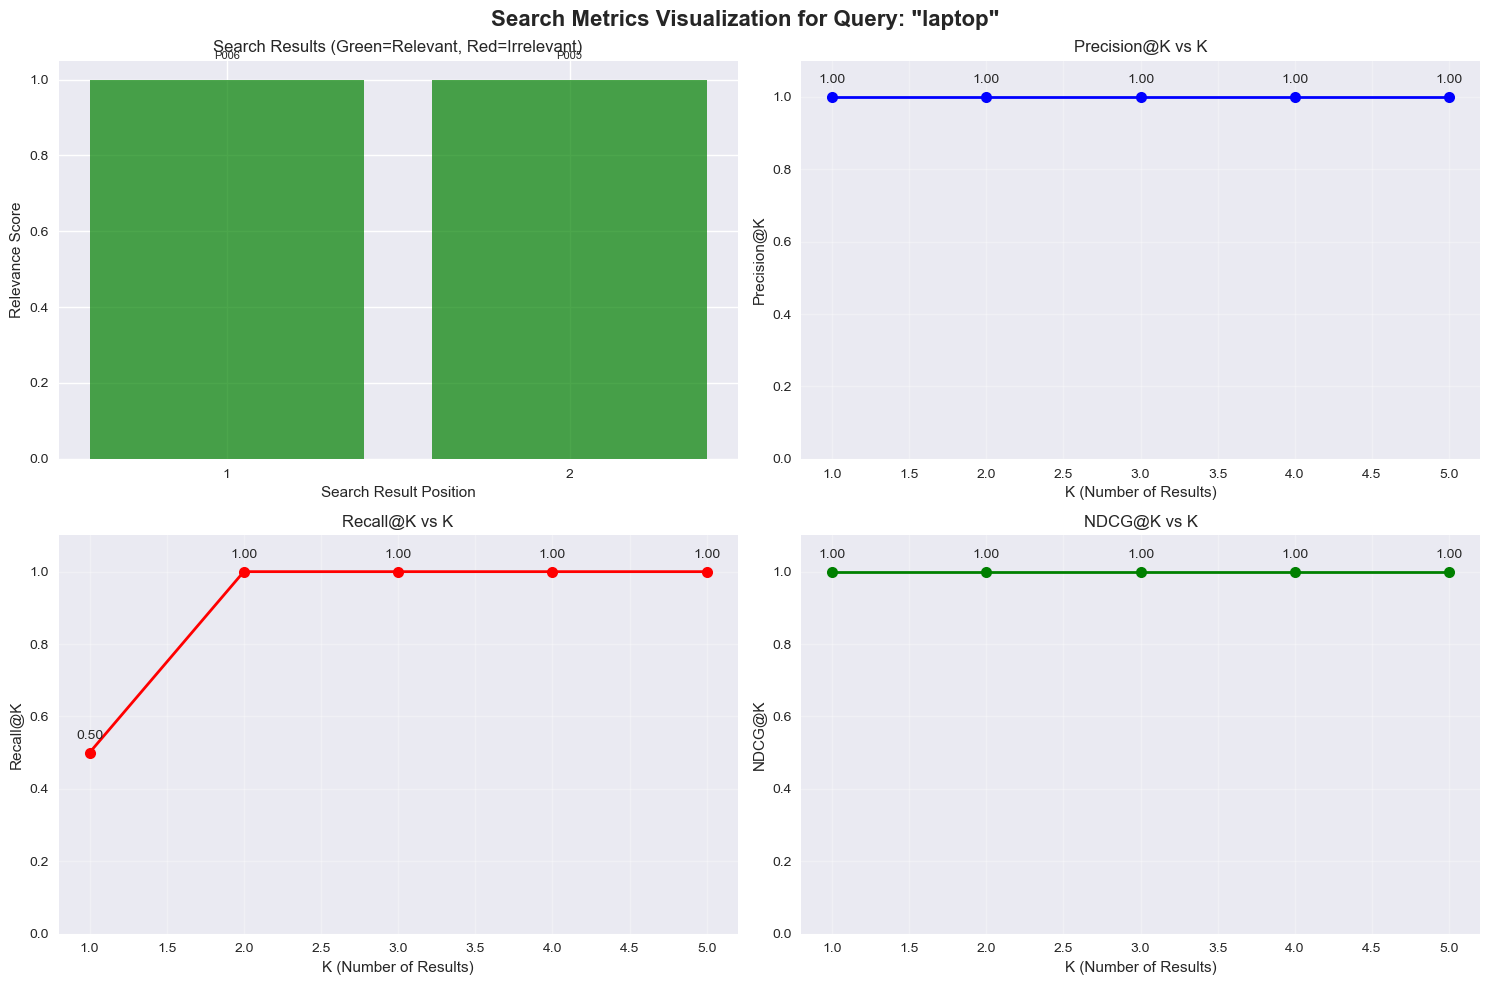


DETAILED METRICS BREAKDOWN FOR 'laptop':
Retrieved items: ['P006', 'P005']
Relevant items: ['P006', 'P005']
Relevance scores: [1, 1]

METRICS AT DIFFERENT K VALUES:
----------------------------------------
K   Precision@K  Recall@K   NDCG@K    
----------------------------------------
1   1.000        0.500      1.000     
2   1.000        1.000      1.000     
3   1.000        1.000      1.000     
4   1.000        1.000      1.000     
5   1.000        1.000      1.000     

INTERPRETATION:
• Precision@1 = 1.000: 100.0% of top result is relevant
• Recall@3 = 1.000: Found 100.0% of all relevant items in top 3
• NDCG@5 = 1.000: Overall ranking quality considering position and relevance


In [6]:
# Visual Metrics Explanation

def create_metrics_visualization():
    """Create visual explanation of how metrics work"""
    
    # Example search results for visualization
    example_query = "laptop"
    results = search_system.search(example_query, top_k=5)
    retrieved_items = [r['product']['id'] for r in results]
    relevance_scores = [r['relevance_score'] for r in results]
    relevant_items = set(query_relevance[example_query].keys())
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Search Metrics Visualization for Query: "{example_query}"', fontsize=16, fontweight='bold')
    
    # Plot 1: Search Results with Relevance
    ax1 = axes[0, 0]
    colors = ['green' if item in relevant_items else 'red' for item in retrieved_items]
    bars = ax1.bar(range(1, len(retrieved_items) + 1), relevance_scores, color=colors, alpha=0.7)
    ax1.set_xlabel('Search Result Position')
    ax1.set_ylabel('Relevance Score')
    ax1.set_title('Search Results (Green=Relevant, Red=Irrelevant)')
    ax1.set_xticks(range(1, len(retrieved_items) + 1))
    
    # Add labels
    for i, (bar, item) in enumerate(zip(bars, retrieved_items)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{item}', ha='center', va='bottom', fontsize=8)
    
    # Plot 2: Precision@K for different K values
    ax2 = axes[0, 1]
    k_values = [1, 2, 3, 4, 5]
    precision_values = []
    for k in k_values:
        precision = SearchMetricsCalculator.precision_at_k(relevant_items, retrieved_items, k)
        precision_values.append(precision)
    
    ax2.plot(k_values, precision_values, 'bo-', linewidth=2, markersize=8)
    ax2.set_xlabel('K (Number of Results)')
    ax2.set_ylabel('Precision@K')
    ax2.set_title('Precision@K vs K')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1.1)
    
    # Add value labels
    for k, p in zip(k_values, precision_values):
        ax2.annotate(f'{p:.2f}', (k, p), textcoords="offset points", xytext=(0,10), ha='center')
    
    # Plot 3: Recall@K for different K values
    ax3 = axes[1, 0]
    recall_values = []
    for k in k_values:
        recall = SearchMetricsCalculator.recall_at_k(relevant_items, retrieved_items, k)
        recall_values.append(recall)
    
    ax3.plot(k_values, recall_values, 'ro-', linewidth=2, markersize=8)
    ax3.set_xlabel('K (Number of Results)')
    ax3.set_ylabel('Recall@K')
    ax3.set_title('Recall@K vs K')
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, 1.1)
    
    # Add value labels
    for k, r in zip(k_values, recall_values):
        ax3.annotate(f'{r:.2f}', (k, r), textcoords="offset points", xytext=(0,10), ha='center')
    
    # Plot 4: NDCG@K for different K values
    ax4 = axes[1, 1]
    ndcg_values = []
    for k in k_values:
        ndcg = SearchMetricsCalculator.ndcg_at_k(relevance_scores, k)
        ndcg_values.append(ndcg)
    
    ax4.plot(k_values, ndcg_values, 'go-', linewidth=2, markersize=8)
    ax4.set_xlabel('K (Number of Results)')
    ax4.set_ylabel('NDCG@K')
    ax4.set_title('NDCG@K vs K')
    ax4.grid(True, alpha=0.3)
    ax4.set_ylim(0, 1.1)
    
    # Add value labels
    for k, n in zip(k_values, ndcg_values):
        ax4.annotate(f'{n:.2f}', (k, n), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed explanation
    print(f"\nDETAILED METRICS BREAKDOWN FOR '{example_query}':")
    print("="*60)
    print(f"Retrieved items: {retrieved_items}")
    print(f"Relevant items: {list(relevant_items)}")
    print(f"Relevance scores: {relevance_scores}")
    
    print(f"\nMETRICS AT DIFFERENT K VALUES:")
    print("-" * 40)
    print(f"{'K':<3} {'Precision@K':<12} {'Recall@K':<10} {'NDCG@K':<10}")
    print("-" * 40)
    for k, p, r, n in zip(k_values, precision_values, recall_values, ndcg_values):
        print(f"{k:<3} {p:<12.3f} {r:<10.3f} {n:<10.3f}")
    
    print(f"\nINTERPRETATION:")
    print(f"• Precision@1 = {precision_values[0]:.3f}: {precision_values[0]*100:.1f}% of top result is relevant")
    print(f"• Recall@3 = {recall_values[2]:.3f}: Found {recall_values[2]*100:.1f}% of all relevant items in top 3")
    print(f"• NDCG@5 = {ndcg_values[4]:.3f}: Overall ranking quality considering position and relevance")

# Create the visualization
create_metrics_visualization()


SEARCH QUALITY SCENARIOS COMPARISON
METRICS COMPARISON TABLE:
--------------------------------------------------------------------------------
Scenario        Retrieved            P@3      R@3      NDCG@3  
--------------------------------------------------------------------------------
Perfect Search  ['P001', 'P002', '... 1.000    1.000    1.000   
Good Search     ['P001', 'P003', '... 1.000    1.000    1.000   
Poor Search     ['P005', 'P004', '... 0.333    0.333    0.373   
Random Search   ['P004', 'P005', '... 0.333    0.333    0.373   


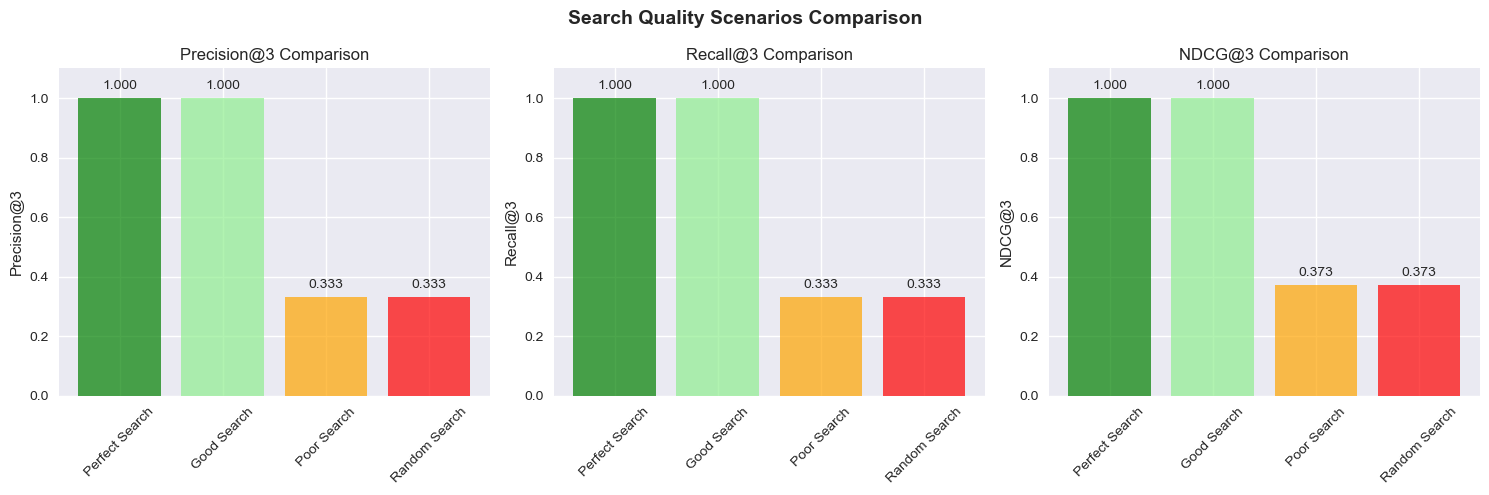


INTERPRETATION OF RESULTS:
--------------------------------------------------
• Perfect Search: All relevant items in top 3, perfect metrics
• Good Search: Most relevant items in top 3, high metrics
• Poor Search: Relevant items pushed down, lower metrics
• Random Search: Worst case, very low metrics

KEY INSIGHTS:
• Precision@3: Measures how many of top 3 results are relevant
• Recall@3: Measures how many relevant items are found in top 3
• NDCG@3: Considers both relevance and position (higher positions matter more)
• Perfect search: P@3 = R@3 = NDCG@3 = 1.0
• Position matters: NDCG penalizes relevant items in lower positions


In [7]:
# Search Quality Scenarios Comparison

def compare_search_scenarios():
    """Compare different search quality scenarios to understand metrics better"""
    
    print("SEARCH QUALITY SCENARIOS COMPARISON")
    print("="*60)
    
    # Define different search scenarios
    scenarios = {
        "Perfect Search": {
            "retrieved": ["P001", "P002", "P003", "P004", "P005"],
            "relevant": ["P001", "P002", "P003"],
            "scores": [3, 2, 1, 0, 0]
        },
        "Good Search": {
            "retrieved": ["P001", "P003", "P002", "P005", "P004"],
            "relevant": ["P001", "P002", "P003"],
            "scores": [3, 2, 1, 0, 0]
        },
        "Poor Search": {
            "retrieved": ["P005", "P004", "P001", "P002", "P003"],
            "relevant": ["P001", "P002", "P003"],
            "scores": [0, 0, 3, 2, 1]
        },
        "Random Search": {
            "retrieved": ["P004", "P005", "P001", "P002", "P003"],
            "relevant": ["P001", "P002", "P003"],
            "scores": [0, 0, 3, 2, 1]
        }
    }
    
    # Calculate metrics for each scenario
    results = []
    for scenario_name, scenario in scenarios.items():
        retrieved = scenario["retrieved"]
        relevant = set(scenario["relevant"])
        scores = scenario["scores"]
        
        # Calculate metrics
        precision_3 = SearchMetricsCalculator.precision_at_k(relevant, retrieved, 3)
        recall_3 = SearchMetricsCalculator.recall_at_k(relevant, retrieved, 3)
        ndcg_3 = SearchMetricsCalculator.ndcg_at_k(scores, 3)
        
        results.append({
            "Scenario": scenario_name,
            "Retrieved": retrieved[:3],
            "Relevant": list(relevant),
            "P@3": precision_3,
            "R@3": recall_3,
            "NDCG@3": ndcg_3
        })
    
    # Create comparison table
    df_comparison = pd.DataFrame(results)
    
    print("METRICS COMPARISON TABLE:")
    print("-" * 80)
    print(f"{'Scenario':<15} {'Retrieved':<20} {'P@3':<8} {'R@3':<8} {'NDCG@3':<8}")
    print("-" * 80)
    
    for _, row in df_comparison.iterrows():
        retrieved_str = str(row['Retrieved'])[:18] + "..." if len(str(row['Retrieved'])) > 18 else str(row['Retrieved'])
        print(f"{row['Scenario']:<15} {retrieved_str:<20} {row['P@3']:<8.3f} {row['R@3']:<8.3f} {row['NDCG@3']:<8.3f}")
    
    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Search Quality Scenarios Comparison', fontsize=14, fontweight='bold')
    
    scenarios_list = df_comparison['Scenario'].tolist()
    precision_values = df_comparison['P@3'].tolist()
    recall_values = df_comparison['R@3'].tolist()
    ndcg_values = df_comparison['NDCG@3'].tolist()
    
    # Precision@3 comparison
    axes[0].bar(scenarios_list, precision_values, color=['green', 'lightgreen', 'orange', 'red'], alpha=0.7)
    axes[0].set_title('Precision@3 Comparison')
    axes[0].set_ylabel('Precision@3')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].set_ylim(0, 1.1)
    
    # Add value labels
    for i, v in enumerate(precision_values):
        axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')
    
    # Recall@3 comparison
    axes[1].bar(scenarios_list, recall_values, color=['green', 'lightgreen', 'orange', 'red'], alpha=0.7)
    axes[1].set_title('Recall@3 Comparison')
    axes[1].set_ylabel('Recall@3')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_ylim(0, 1.1)
    
    # Add value labels
    for i, v in enumerate(recall_values):
        axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')
    
    # NDCG@3 comparison
    axes[2].bar(scenarios_list, ndcg_values, color=['green', 'lightgreen', 'orange', 'red'], alpha=0.7)
    axes[2].set_title('NDCG@3 Comparison')
    axes[2].set_ylabel('NDCG@3')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].set_ylim(0, 1.1)
    
    # Add value labels
    for i, v in enumerate(ndcg_values):
        axes[2].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Explain the results
    print(f"\nINTERPRETATION OF RESULTS:")
    print("-" * 50)
    print("• Perfect Search: All relevant items in top 3, perfect metrics")
    print("• Good Search: Most relevant items in top 3, high metrics")
    print("• Poor Search: Relevant items pushed down, lower metrics")
    print("• Random Search: Worst case, very low metrics")
    
    print(f"\nKEY INSIGHTS:")
    print("• Precision@3: Measures how many of top 3 results are relevant")
    print("• Recall@3: Measures how many relevant items are found in top 3")
    print("• NDCG@3: Considers both relevance and position (higher positions matter more)")
    print("• Perfect search: P@3 = R@3 = NDCG@3 = 1.0")
    print("• Position matters: NDCG penalizes relevant items in lower positions")

# Run the comparison
compare_search_scenarios()


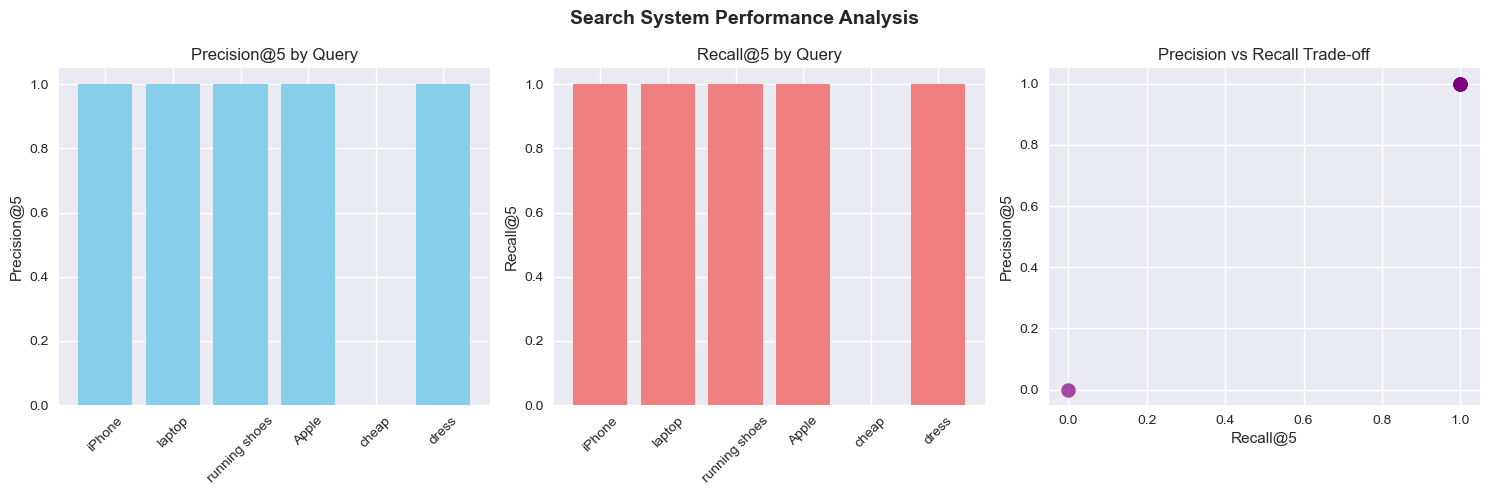

Summary Statistics:
Average Precision@5: 0.833
Average Recall@5: 0.833
Average Results per Query: 1.3


In [8]:
# Performance Analysis and Visualization

# Calculate comprehensive metrics for all queries
metrics_data = []
for query in test_queries:
    results = search_system.search(query, top_k=5)
    retrieved_items = [r['product']['id'] for r in results]
    relevant_items = set(query_relevance.get(query, {}).keys())
    
    # Calculate metrics
    precision_5 = SearchMetricsCalculator.precision_at_k(relevant_items, retrieved_items, 5)
    recall_5 = SearchMetricsCalculator.recall_at_k(relevant_items, retrieved_items, 5)
    
    metrics_data.append({
        'query': query,
        'precision_at_5': precision_5,
        'recall_at_5': recall_5,
        'num_results': len(results)
    })

# Create DataFrame and visualize
metrics_df = pd.DataFrame(metrics_data)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Search System Performance Analysis', fontsize=14, fontweight='bold')

# Precision@5
axes[0].bar(metrics_df['query'], metrics_df['precision_at_5'], color='skyblue')
axes[0].set_title('Precision@5 by Query')
axes[0].set_ylabel('Precision@5')
axes[0].tick_params(axis='x', rotation=45)

# Recall@5
axes[1].bar(metrics_df['query'], metrics_df['recall_at_5'], color='lightcoral')
axes[1].set_title('Recall@5 by Query')
axes[1].set_ylabel('Recall@5')
axes[1].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[2].scatter(metrics_df['recall_at_5'], metrics_df['precision_at_5'], 
                s=100, alpha=0.7, color='purple')
axes[2].set_xlabel('Recall@5')
axes[2].set_ylabel('Precision@5')
axes[2].set_title('Precision vs Recall Trade-off')

plt.tight_layout()
plt.show()

# Summary statistics
print("Summary Statistics:")
print(f"Average Precision@5: {metrics_df['precision_at_5'].mean():.3f}")
print(f"Average Recall@5: {metrics_df['recall_at_5'].mean():.3f}")
print(f"Average Results per Query: {metrics_df['num_results'].mean():.1f}")


## Interview Questions

**Basic Concepts**: "Explain how a search engine works", "What's the difference between search and recommendations?", "How would you measure search quality?"

**Technical Deep Dives**: "How would you handle typos in search queries?", "What's an inverted index and why is it important?", "How would you rank search results?"

**Scale & Performance**: "How would you design a search system for 100M products?", "What caching strategies would you use?", "How would you handle real-time updates?"

**Business Impact**: "How would you increase search conversion rates?", "What A/B tests would you run on search?", "How would you handle international markets?"

**Problem Solving**: "A user searches for 'cheap laptop' but gets expensive results. What's wrong?", "How would you handle zero results?", "Users are clicking on the 3rd result more than the 1st. What does this mean?"

**Walmart-Specific**: "How would you handle seasonal products in search?", "What challenges do you see with Walmart's product diversity?", "How would you optimize for mobile search?"

---

## Key Takeaways

1. **Search is query-driven** - users actively look for something specific
2. **Relevance is key** - results must match user intent
3. **Performance matters** - sub-100ms response times are expected
4. **Metrics are crucial** - measure precision, recall, and business impact
5. **Scale is challenging** - millions of products, thousands of queries/second
6. **Business alignment** - search must drive revenue and conversion

## Next Steps

In the next notebook, we'll dive deeper into: information retrieval & ranking algorithms, advanced search techniques, query understanding and processing, building more sophisticated search systems

---

**Ready for the next challenge? Let's build on this foundation!**


In [9]:
# Let's create a simple search system to understand the concepts

class SimpleSearchSystem:
    """
    A basic search system to demonstrate core concepts
    """
    
    def __init__(self):
        self.products = []
        self.index = {}  # Inverted index: term -> list of product IDs
    
    def add_product(self, product_id: str, title: str, description: str, 
                   category: str, price: float, brand: str):
        """Add a product to the search system"""
        product = {
            'id': product_id,
            'title': title,
            'description': description,
            'category': category,
            'price': price,
            'brand': brand
        }
        self.products.append(product)
        
        # Build inverted index
        text = f"{title} {description} {category} {brand}".lower()
        terms = text.split()
        
        for term in terms:
            if term not in self.index:
                self.index[term] = []
            self.index[term].append(product_id)
    
    def search(self, query: str, top_k: int = 5) -> List[Dict]:
        """Search for products matching the query"""
        query_terms = query.lower().split()
        
        # Find products that match any query term
        matching_products = set()
        for term in query_terms:
            if term in self.index:
                matching_products.update(self.index[term])
        
        # Get product details and calculate simple relevance score
        results = []
        for product_id in matching_products:
            product = next(p for p in self.products if p['id'] == product_id)
            
            # Simple relevance scoring (count of matching terms)
            relevance_score = sum(1 for term in query_terms 
                               if term in f"{product['title']} {product['description']}".lower())
            
            results.append({
                'product': product,
                'relevance_score': relevance_score
            })
        
        # Sort by relevance score and return top K
        results.sort(key=lambda x: x['relevance_score'], reverse=True)
        return results[:top_k]

# Create a sample search system
search_system = SimpleSearchSystem()

# Add some sample products
products_data = [
    ("P001", "iPhone 14 Pro", "Latest Apple smartphone with advanced camera", "Electronics", 999.99, "Apple"),
    ("P002", "Samsung Galaxy S23", "Android smartphone with great camera", "Electronics", 799.99, "Samsung"),
    ("P003", "Nike Air Max", "Comfortable running shoes", "Shoes", 129.99, "Nike"),
    ("P004", "Adidas Ultraboost", "Premium running shoes", "Shoes", 180.00, "Adidas"),
    ("P005", "MacBook Pro 16", "Professional laptop for work", "Electronics", 2499.99, "Apple"),
    ("P006", "Dell XPS 13", "Ultrabook laptop", "Electronics", 1199.99, "Dell"),
    ("P007", "Red Dress", "Elegant evening dress", "Clothing", 89.99, "Fashion Brand"),
    ("P008", "Blue Jeans", "Classic denim jeans", "Clothing", 59.99, "Denim Co"),
]

for product in products_data:
    search_system.add_product(*product)

print("✅ Sample search system created with 8 products!")
print(f"📦 Products added: {len(search_system.products)}")
print(f"🔍 Index terms: {len(search_system.index)}")


✅ Sample search system created with 8 products!
📦 Products added: 8
🔍 Index terms: 46


In [10]:
# Let's test our search system with different queries

def display_search_results(query: str, results: List[Dict]):
    """Display search results in a nice format"""
    print(f"\n🔍 Search Query: '{query}'")
    print("=" * 50)
    
    if not results:
        print("❌ No results found")
        return
    
    for i, result in enumerate(results, 1):
        product = result['product']
        score = result['relevance_score']
        print(f"{i}. {product['title']} - ${product['price']}")
        print(f"   Brand: {product['brand']} | Category: {product['category']}")
        print(f"   Description: {product['description']}")
        print(f"   Relevance Score: {score}")
        print()

# Test different search queries
test_queries = [
    "iPhone",
    "laptop",
    "running shoes",
    "Apple",
    "cheap",
    "dress"
]

for query in test_queries:
    results = search_system.search(query, top_k=3)
    display_search_results(query, results)



🔍 Search Query: 'iPhone'
1. iPhone 14 Pro - $999.99
   Brand: Apple | Category: Electronics
   Description: Latest Apple smartphone with advanced camera
   Relevance Score: 1


🔍 Search Query: 'laptop'
1. Dell XPS 13 - $1199.99
   Brand: Dell | Category: Electronics
   Description: Ultrabook laptop
   Relevance Score: 1

2. MacBook Pro 16 - $2499.99
   Brand: Apple | Category: Electronics
   Description: Professional laptop for work
   Relevance Score: 1


🔍 Search Query: 'running shoes'
1. Nike Air Max - $129.99
   Brand: Nike | Category: Shoes
   Description: Comfortable running shoes
   Relevance Score: 2

2. Adidas Ultraboost - $180.0
   Brand: Adidas | Category: Shoes
   Description: Premium running shoes
   Relevance Score: 2


🔍 Search Query: 'Apple'
1. iPhone 14 Pro - $999.99
   Brand: Apple | Category: Electronics
   Description: Latest Apple smartphone with advanced camera
   Relevance Score: 1

2. MacBook Pro 16 - $2499.99
   Brand: Apple | Category: Electronics
   Descript

In [11]:
# Let's analyze search performance and create some visualizations

def calculate_search_metrics(query: str, results: List[Dict], relevant_products: List[str]) -> Dict:
    """Calculate basic search metrics"""
    if not results:
        return {
            'precision_at_5': 0.0,
            'recall_at_5': 0.0,
            'num_results': 0
        }
    
    # Get product IDs from results
    result_ids = [r['product']['id'] for r in results]
    
    # Calculate precision@5
    relevant_in_results = len(set(result_ids) & set(relevant_products))
    precision_at_5 = relevant_in_results / len(results) if results else 0
    
    # Calculate recall@5
    recall_at_5 = relevant_in_results / len(relevant_products) if relevant_products else 0
    
    return {
        'precision_at_5': precision_at_5,
        'recall_at_5': recall_at_5,
        'num_results': len(results)
    }

# Define what we consider "relevant" for each query
query_relevance = {
    "iPhone": ["P001"],  # Only iPhone 14 Pro
    "laptop": ["P005", "P006"],  # MacBook and Dell
    "running shoes": ["P003", "P004"],  # Nike and Adidas
    "Apple": ["P001", "P005"],  # iPhone and MacBook
    "cheap": ["P007", "P008"],  # Dress and Jeans (lowest prices)
    "dress": ["P007"]  # Only the dress
}

# Calculate metrics for each query
metrics_data = []
for query in test_queries:
    results = search_system.search(query, top_k=5)
    relevant = query_relevance.get(query, [])
    metrics = calculate_search_metrics(query, results, relevant)
    metrics['query'] = query
    metrics_data.append(metrics)

# Create a DataFrame for analysis
metrics_df = pd.DataFrame(metrics_data)
print("📊 Search Performance Metrics:")
print(metrics_df.round(3))


📊 Search Performance Metrics:
   precision_at_5  recall_at_5  num_results          query
0             1.0          1.0            1         iPhone
1             1.0          1.0            2         laptop
2             1.0          1.0            2  running shoes
3             1.0          1.0            2          Apple
4             0.0          0.0            0          cheap
5             1.0          1.0            1          dress


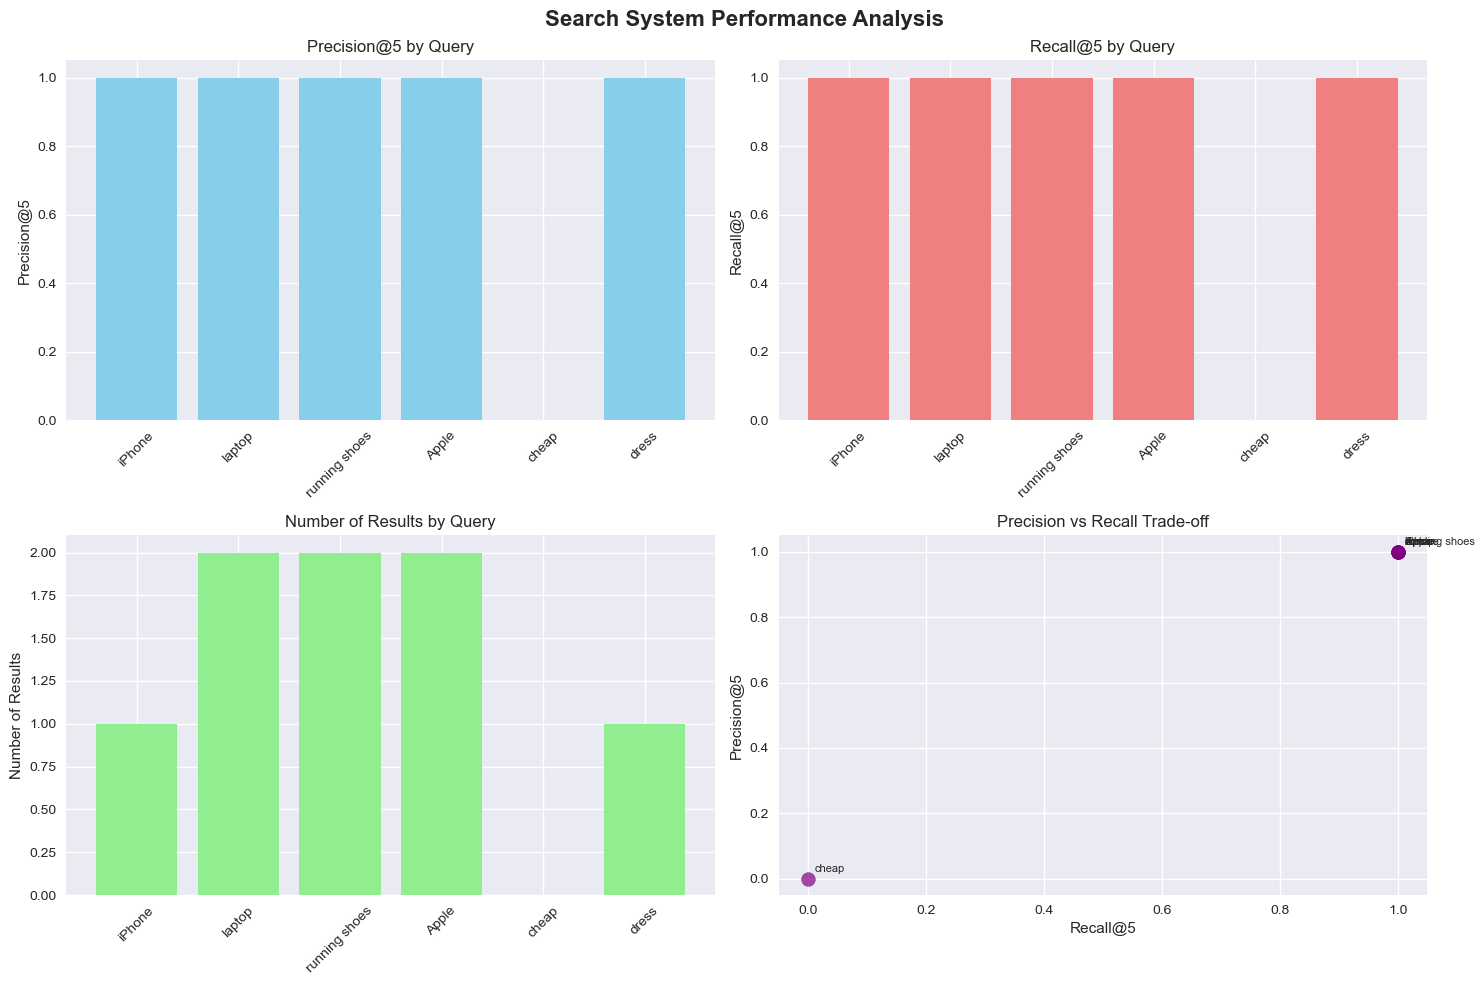


📈 Summary Statistics:
Average Precision@5: 0.833
Average Recall@5: 0.833
Average Results per Query: 1.3


In [12]:
# Visualize search performance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Search System Performance Analysis', fontsize=16, fontweight='bold')

# Precision@5 by query
axes[0, 0].bar(metrics_df['query'], metrics_df['precision_at_5'], color='skyblue')
axes[0, 0].set_title('Precision@5 by Query')
axes[0, 0].set_ylabel('Precision@5')
axes[0, 0].tick_params(axis='x', rotation=45)

# Recall@5 by query
axes[0, 1].bar(metrics_df['query'], metrics_df['recall_at_5'], color='lightcoral')
axes[0, 1].set_title('Recall@5 by Query')
axes[0, 1].set_ylabel('Recall@5')
axes[0, 1].tick_params(axis='x', rotation=45)

# Number of results by query
axes[1, 0].bar(metrics_df['query'], metrics_df['num_results'], color='lightgreen')
axes[1, 0].set_title('Number of Results by Query')
axes[1, 0].set_ylabel('Number of Results')
axes[1, 0].tick_params(axis='x', rotation=45)

# Precision vs Recall scatter plot
axes[1, 1].scatter(metrics_df['recall_at_5'], metrics_df['precision_at_5'], 
                   s=100, alpha=0.7, color='purple')
axes[1, 1].set_xlabel('Recall@5')
axes[1, 1].set_ylabel('Precision@5')
axes[1, 1].set_title('Precision vs Recall Trade-off')

# Add query labels to scatter plot
for i, query in enumerate(metrics_df['query']):
    axes[1, 1].annotate(query, 
                       (metrics_df['recall_at_5'].iloc[i], metrics_df['precision_at_5'].iloc[i]),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📈 Summary Statistics:")
print(f"Average Precision@5: {metrics_df['precision_at_5'].mean():.3f}")
print(f"Average Recall@5: {metrics_df['recall_at_5'].mean():.3f}")
print(f"Average Results per Query: {metrics_df['num_results'].mean():.1f}")


## Interview Questions

Here are some common interview questions for search system roles:

### 1. **Basic Concepts**
- "Explain how a search engine works"
- "What's the difference between search and recommendations?"
- "How would you measure search quality?"

### 2. **Technical Deep Dives**
- "How would you handle typos in search queries?"
- "What's an inverted index and why is it important?"
- "How would you rank search results?"

### 3. **Scale & Performance**
- "How would you design a search system for 100M products?"
- "What caching strategies would you use?"
- "How would you handle real-time updates?"

### 4. **Business Impact**
- "How would you increase search conversion rates?"
- "What A/B tests would you run on search?"
- "How would you handle international markets?"

### 5. **Problem Solving**
- "A user searches for 'cheap laptop' but gets expensive results. What's wrong?"
- "How would you handle zero results?"
- "Users are clicking on the 3rd result more than the 1st. What does this mean?"

### 6. **Walmart-Specific**
- "How would you handle seasonal products in search?"
- "What challenges do you see with Walmart's product diversity?"
- "How would you optimize for mobile search?"

---

## 🎯 Key Takeaways

1. **Search is query-driven** - users actively look for something specific
2. **Relevance is key** - results must match user intent
3. **Performance matters** - sub-100ms response times are expected
4. **Metrics are crucial** - measure precision, recall, and business impact
5. **Scale is challenging** - millions of products, thousands of queries/second
6. **Business alignment** - search must drive revenue and conversion

## 🚀 Next Steps

In the next notebook, we'll dive deeper into:
- Information Retrieval & Ranking algorithms
- Advanced search techniques
- Query understanding and processing
- Building more sophisticated search systems

---

**Ready for the next challenge? Let's build on this foundation! 🚀**
